# Question 1

1) Determine the environment, agent, action, observation and the rewards in the following

1. A game of chess<br>
Environment: Chess board<br>
Agent: Player making decisions<br>
Action: Move on chess board<br>
Observation:observing chess pieces state and observing opponents moves<br>
Reward: Checkmate<br>
<br>
2.	Dog training<br>
Environment: World<br>
Agent: Dog<br>
Action: Dog taking action such as sit, stand, roll over, paw, etc <br>
Observation: Dog observersing environment <br>
Reward: Possibly treats or affection <br>
<br>
3.	A computer game<br>
Environment: World in computer game<br>
Agent: Character controlled by player <br>
Action: Character making moves such as move, crouch, run, shoot, jump, etc <br>
Observation: Watching through screen <br>
Reward: Wins, victorys, completing missions, achievement unlocking, <br>



In [1]:
#Question 2

In [2]:
pip install gym[all]

  Using cached lz4-3.1.10-cp38-cp38-win_amd64.whl
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Using cached ale_py-0.7.3-cp38-cp38-win_amd64.whl (925 kB)
  Running setup.py clean for box2d-py
  Running setup.py clean for mujoco-py
Failed to build box2d-py mujoco-py
    Running setup.py install for mujoco-py: started
    Running setup.py install for mujoco-py: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-3pvjb30i\\box2d-py_44d4c8534fde4ef4b1f45c8f9bc5a96e\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-3pvjb30i\\box2d-py_44d4c8534fde4ef4b1f45c8f9bc5a96e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-1h8r7qwc'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-3pvjb30i\box2d-py_44d4c8534fde4ef4b1f45c8f9bc5a96e\
  Complete output (16 lines):
  Using setuptools (version 50.3.1.post20201107).
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Box2D
  copying library\Box2

In [3]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [4]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

array([-0.52326185,  0.        ], dtype=float32)

In [5]:
# Import and initialize Mountain Car Environment
env2 = gym.make('MountainCar-v0')
env2.reset()

#Car's staste is at any point in time given by horizontal position and velocity
#currently, it is at -0.5 with 0 velocity
#ends when car reaches flag position (position >0.5) or after 200 moves 


#3 actions, push left, push right, do nothing
#penalty of 1 unit for each move taking (including doing nothing) 

array([-0.46524316,  0.        ], dtype=float32)

In [6]:
#state space
# set of all possible states of the environment you can be in 
#2D box

#action space
#set of all actions you can take within the environment
#Three discrete actions 
#0, 1, 2


#Car's State is given containing horizontal position and velocity

#env.observation_space.low gives 

In [7]:

# Qlearning function 

def QLearning2(env, learning, discount, epsilon, min_eps, episodes):
    
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)* np.array([10, 100])
    print("Num of states: ", len(num_states))
    num_states = np.round(num_states, 0).astype(int) + 1
    print("Num of states: ", len(num_states))
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], env.action_space.n))
  
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    #Q(s1, S2, a)
    
    # Run Q learning algorithm
    for i in range(episodes):
        
        # Initialize parameters
        done = False
        tot_reward = 0
        reward = 0
        
        # Discretize state
        state = env.reset()
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:   
            
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            #epsilon must be greater than 1 for next action. or else it'll stay put
            #too small of episolon will require either more episodes to converge 
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
                
            else:
                
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                #Q’(s1, s2, a) = (1 — w)*Q(s1, s2, a) + w*(r+d*Q(s1’, s2’, argmax a’ Q(s1’, s2’, a’)))
                delta = learning*(reward + discount*np.max(Q[state2_adj[0], state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list


In [8]:

# Run Q-learning algorithm
#QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards2 = QLearning2(env2, 0.2, 0.9, 0.8, 0, 5000)

Num of states:  2
Num of states:  2
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -199.7
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
E

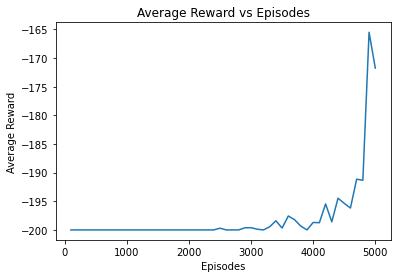

In [10]:
# Plot Rewards
plt.plot(100*(np.arange(len(rewards2)) + 1), rewards2)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
#plt.close()  